# Goal : Save the Safada (or the ambiguous ones)
***
## 0. CD-HIT step
## I. Loading the dataframes
## II. Transform the features : PCA
## III. Clustering
## IV. Scan the results
***


0.

In [ ]:
# The current millard_depo contains 11513 proteins. Let's cluster at 95% to reduce the dataset:

import os

path_work = "/media/concha-eloko/Linux/DepoPhagedetection_work"
dataset = f"{path_work}/millard_depo.indexed.v3.fasta"

cd-hit -i millard_depo.indexed.v3.fasta -o millard_depo.indexed.v3.reduced.fasta -c 0.95 -G 0 -aL 0.8

In [ ]:
from Bio import SeqIO
import os

path_work = "/media/concha-eloko/Linux/DepoPhagedetection_work"

reduced = SeqIO.parse(f"{path_work}/millard_depo.indexed.v3.reduced.fasta" , "fasta")

list_indices_millard = []
for record in reduced :
    list_indices_millard.append(record.id)

In [ ]:
print(len(list_indices_millard))

***

In [4]:
import pandas as pd 
import os 
import json

path_df = "/media/concha-eloko/Linux/depolymerase_building/DBsuite_Dpo_files"

# The embeddings dataframe
df_embeddings = pd.read_csv(f"{path_df}/embeddings.proteins.v2.csv", header = None)
df_embeddings

# The index to protein id dataframe
df_seq_index = pd.read_csv(f"{path_df}/df_sequences.index.v2.csv", sep = "\t", header = None)

# The id to annotation dico
dico_id_annotation = json.load(open(f"{path_df}/proteinID_annotation.v2.json"))
annotations_1 = []
for _, row in df_seq_index.iterrows() :
    annotations_1.append(dico_id_annotation[row[1]])
df_seq_index["annotation"] = annotations_1  
df_seq_index_final = df_seq_index.drop_duplicates(subset=[0] , keep = "first")
df_seq_index_final.columns = ["index", "protein_id","sequence","annotation"]

X = df_embeddings.iloc[:, 1:-1]
index = df_embeddings.iloc[:, 0]

In [5]:
df_seq_index_final

,index,protein_id,sequence,annotation
0,0,GU339467_00011,MTFVVTRERAQWVHDMARARAGLPYSYGGAFTNDPKRSTDCSGLVL...,endolysin
1,1,GU339467_00062,MAGLNRKIILTADGFRVGVTEVGQGVPLVFLHGLSVSAQAYDELFI...,esterase/lipase
2,2,AC171169_00117,MSVTTKIIVQQILNIDDTKATASKFPRYTVTLGNSISSITASELVS...,tail fiber protein
3,3,AC171169_00126,MSLQLLRNTRIFVSTVKTGHDKTNTQEILVQDDISWGQDSNSTDIT...,major tail protein
4,4,MW175890_00022,MAEREYTKAPAPNLNRAYKLLIGSATNTIQKRTKNSAFKSTVDLDT...,virion structural protein
...,...,...,...,...
9163,6811,AY264776_00039,MANVIKTVLTYQLDGSNRDFNIPFEYLARKFVVVTLIGVDRKVLTI...,tail fiber protein
9164,6812,AY264775_00044,MANVIKTVLTYQLDGSNRDFNIPFEYLARKFVVVTLIGVDRKVLTI...,tail fiber protein
9165,6813,AP008986_00036,MASPSIVDELVVTLSLDSQDYDKVEARVEKNASRTFRAQQERARKT...,tail length tape measure protein
9166,6814,DQ163912_00060,MKITADQLDRATGCGAATADIWIDHINGALARFEINTPERVAMFLA...,endolysin


In [ ]:
df_seq_index_final[df_seq_index_final["index"] == 1479]["sequence"].values[0]

'MNKAHIDINWENYPSDETPLNERNLNKMDGSIDIIDDRVITLDTTKATKAEVATLVADVTFEESTGIITITKKNGSKITIDTQMEKIAINFDYNPITQQIILTLIDGTKQYIDLSALITQYEFHDSDTVAFYIDKDGKVSAIVKEGSIEEKHLEPNYLAKIKVEVAKAESSQQAAAKSEINAKASENAAKASETAAKTSETNAKASETAAAKSATAAAISETNAKASETSASQSAATATSEAASASQSASTAIDKATIATQKATEIIGKAESAAESAAKAQSYAVGGTGSREGEDSDNAKYYYQQAKDVSEGLKGGLQPHGTVAFADLPALADVSTGWMFNISDEFTTTDDFKEGAGNVIPAGANIYKTSDEKWDVLAGTPVTGIKGVNEDSFRRGNVELTAENVGAVATGGDTAENTATFTSSDVADGSASAWTTVSKLSSGEKHSSIFAKVSQMFKNVRYLYKMLGTTDISKIGNGTCTGAISSLNSSLANHLPLSGGTMTGTIIGQHKLPGSTASDSNGMVLGVQTTGNTGIFNGNGDGNGAGVANLIIKSWYGVGFVDGCSGQGMTVGIDCRSGNITCNSITIRNVGSVTDLLNSKLSTSASCNKNWNWSGKNETPAWIWGGSDGTNMYVYNPTYILVQGIRNRVTNRAMTITNDNHVRTYESNGVGMNGAISLGSANYRFSQLYVTSSSISTSDKNYKDDIKSLTDKHLQFFMKLQPVSFLFKDGTSGRTHIGFIAQDVEQAMSECGLTDLDFAGFCKDQKIDSKLVDGEEVNEPILDENGNPEYIYSLRYEEFIALNTYVIQELWKRVDAVEKENIETKNQIKSMQQDIAELKKIRA'

In [8]:
df_seq_index_final[df_seq_index_final["index"] == 2170]["annotation"].values[0]

'tail fiber protein'

In [4]:
good_annotation = ['tail fiber protein',
 'tail spike protein',
 'tail protein',
 'EPS depolymerase',
 'tail protein with endopeptidase domain protein',
 'baseplate protein',
 'colanic acid degradation',
 'tail fiber protein; host specificity',
 'lytic tail fiber protein',
 'pectate lyase',
 'Sialidase B',
 'tail collar fiber protein',
 'pectin lyase activity',
 'receptor binding tail protein',
 'tail spike protein with colonic acid degradation activity',
 'hyaluronidase',
 'tail fiber protein and host specificity',
 'short tail fiber protein'
 'GDSL lipase']

# out :  'lytic tail protein',


In [5]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import scipy as sp
import subprocess
from scipy.spatial import distance
from tqdm import tqdm
from collections import Counter
import math
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

***
## II. PCA

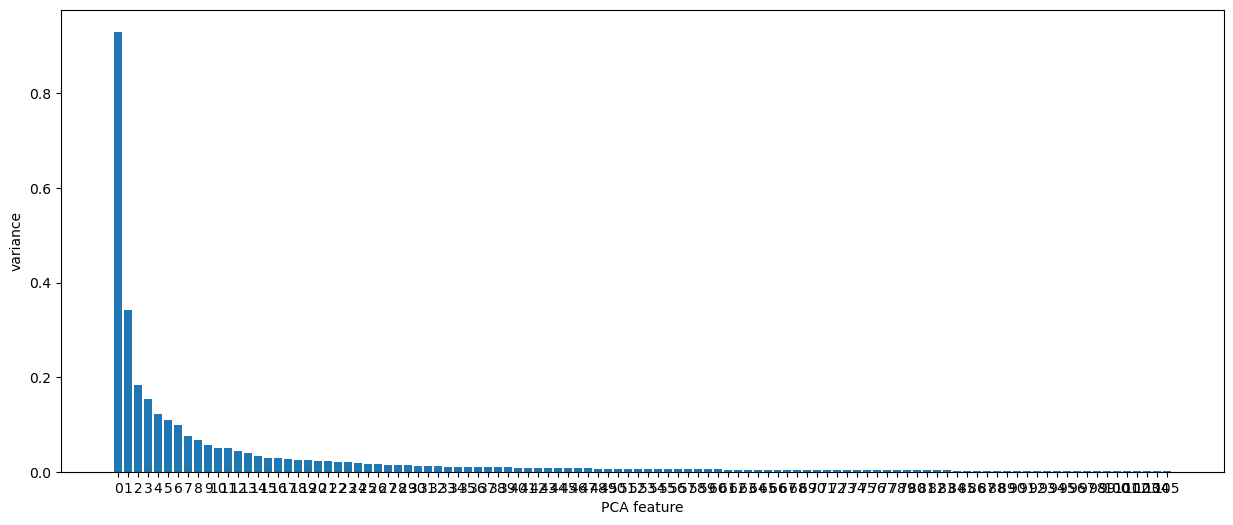

In [6]:
pca = PCA(.95)
pca_scaled_x = pca.fit_transform(X)


    # Writing the figures :
features = range(pca.n_components_)
plt.figure(figsize=(15, 6))
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
#plt.savefig(f"{path_fig}/PCA.features.jpeg")
plt.show()

*** 
## III. Affinity propagation

In [7]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

af = AffinityPropagation(damping=0.90, preference=None, random_state=123, max_iter=1000,verbose=True).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)
n_clusters_

Converged after 170 iterations.


389

In [8]:
# Preparing the annotation for the 

dico_annotation = {}
for index__ in tqdm(index) :
    annotation = df_seq_index_final[df_seq_index_final["index"] == index__]["annotation"].values[0]
    dico_annotation[index__] = annotation
    
cluster_full_df={}
for i_label, cluster in enumerate(labels):
    if cluster not in cluster_full_df :
        k_types=[]
        pair_tuple = (i_label, dico_annotation[i_label],)
        k_types.append(pair_tuple)
        cluster_full_df[cluster]=k_types
    else :
        pair_tuple = (i_label, dico_annotation[i_label],)
        cluster_full_df[cluster].append(pair_tuple)

100%|███████████████████████████████████████████████████████████████████████████████████| 6816/6816 [00:01<00:00, 4001.54it/s]


***
## IV. Scanning the results

In [8]:
def propagate_cluster(X, cluster_full_df, cluster_id, preference_in) :
    """
    The function computes clustering using affinity propagation. 
    
    Inputs :
    - pca_numpy_arr : the output of the PCA on the full dataset
    - cluster_full_df : the results dictionary on the full dataset
    - The cluster ID (based on the clustering of the full dataset) for which we wish to compute the cluster
    - The preference parameter for the clustering 
    
    Outputs : 
    - a results dictionary {id_subcluster : [(index_protein, annotation)]} 
    # for plotting the cluster
    - the labels
    - the cluster_centers_indices
    
    exemple : out = propagate_cluster(pca_scaled_x,cluster_full_df, 4 , None)
    """
    #dataframe_scaled = pd.DataFrame(pca_numpy_arr)
    X["ID"] = index
    sequence_id = [member[0] for member in cluster_full_df[cluster_id]]
    df_cluster = X[X["ID"].isin(sequence_id)]
    
    X_df = df_cluster.drop(columns = ["ID"])
    
    af = AffinityPropagation(damping=0.90, preference= preference_in, random_state=123, max_iter=1000,verbose=True).fit(X_df)
    cluster_centers_indices = af.cluster_centers_indices_
    labels = af.labels_
    
    list_types = []
    for index__ in tqdm(index) :
        annotation = df_seq_index_final[df_seq_index_final["index"] == index__]["annotation"].values[0]
        list_types.append((index__ ,annotation))
    
    id_cluster={}
    for i_label, cluster in enumerate(labels):
        if cluster not in id_cluster :
            k_types=[]
            k_types.append(list_types[i_label])
            id_cluster[cluster]=k_types
        else :
            id_cluster[cluster].append(list_types[i_label])
    
    return id_cluster


In [10]:
out = propagate_cluster(X,cluster_full_df, 80 ,None)
out

Converged after 15 iterations.


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6816/6816 [00:02<00:00, 3302.00it/s]


{0: [(1009, 'fibritin neck whisker'),
  (4905, 'tail fiber protein'),
  (1487, 'tail protein'),
  (5070, 'internal virion protein with endolysin domain protein'),
  (1138, 'unknown function')]}

In [9]:
df_seq_index_final[df_seq_index_final["index"]==5070]["sequence"].values[0]

'MNFEEEYAQAKTKGSPYDVSIQRAAEAHGVSYDFLHKQLFMESRFNPKAKSKTGPRGLGQFTTTTGKAYGLETDEDFFDPEKSIDAAARHLKDNLTASNGDYLEAALLYNQGGGRLGRPQIAALKEGKLDQISEEGRKYMANLQDVAGDSPFKVMLQGPGHGVSNPGITPKSDAVSFAQATDGVTSSLKTQRGATPQLGDMAVKGSAVEPTRQTFAEFQDITKKAPQGWFEGTGKAVEAELATSPLGQLFRNVTMETVDPMEGYETHDTSAWGDDEFDKIRKAGVNSQFYNFLFDQTRGNKGRLDSAIKMALENQKYQQQTRGASGSAQVLAGFIGAGADPFTYMPLPGATGTKLFSKVLQGAAGAGVSSMASEGLREASTGMEAHYGTALVGGALVGGGLTALVDRIAARAVPDQRLDMWDGDLEKYLAMHNEGALPNEFHGPSVRLESRETARQGGFEDPTKMHWQAHEKVESLHGIDFVRVPGEPGAVRLADGSILSDGNPLNPLTIQSFKDAERAAQGVSMGGFTEISYTLLRSENEDIRGLAGQLVRSTTGTESGSHGKFGAVASDIVERIGGQDHVTYNTVVDAMHEAIKDVRYANMPGGRQAHFDELGRRVVNALEDRSGAAMKNLTSAERVLADHLNGHFTGKMDMLQNPAQFGNPRATSVLSGSRHEGFYFPHVYDDAAKNLILKVLGGSKEAFQQAIVQSMLKTYGRPHVKARVDAMIAEANQGKKMTPRQLADAVEEYARNKAYGISHTQDFNRSHLVDDQVTGLVGAENNNFLEGRHLFESDGEVTLPNGDTFSLNDLRSYDVQSIMPSYDRRVNGDIGIMGATGESTEAIKDRITALGVGMENKKEYKALQDALKILTGRARRDPDGVFATLARSLSDLSFLAKNAYMGIQGITETAALVTKGHTRMLLKGVPFFKEIATMGSKASPKFLDDMHGLVFGRELDDLIRPKRSDIIMRLRDNADAPPMVAKAVGTLKYMTQEASARWP

> Plot the results

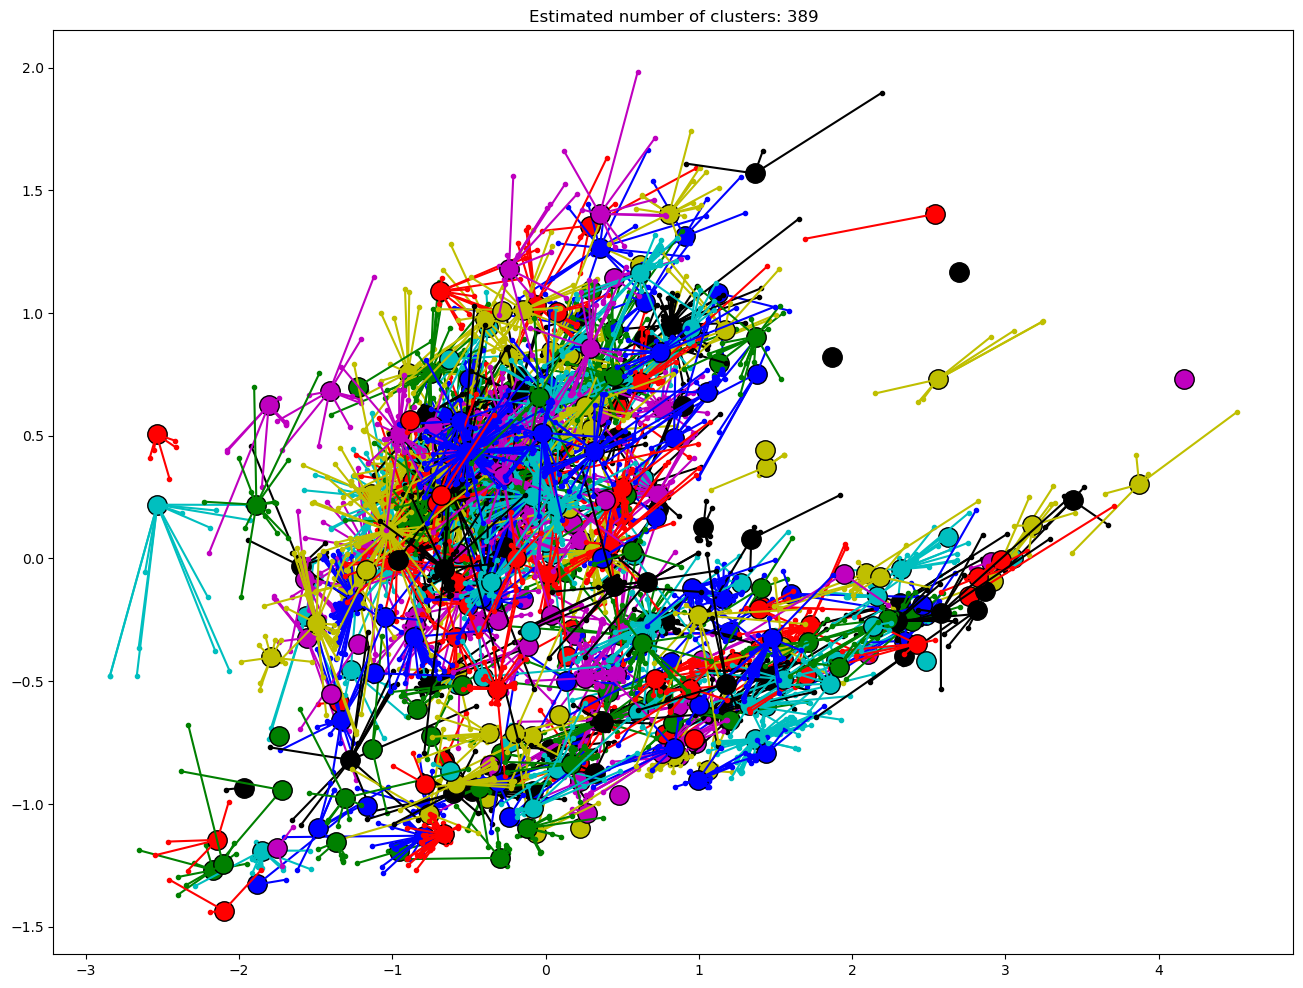

In [9]:
import matplotlib.pyplot as plt
from itertools import cycle

plt.close("all")
plt.figure(figsize=(16, 12))
plt.clf()

colors = cycle("bgrcmykbgrcmykbgrcmykbgrcmyk")
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = pca_scaled_x[cluster_centers_indices[k]]
    plt.plot(pca_scaled_x[class_members, 0], pca_scaled_x[class_members, 1], col + ".")
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=14,
    )
    for x in pca_scaled_x[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title("Estimated number of clusters: %d" % n_clusters_)
#plt.savefig(f"{path_fig}/AffPropagation.small.features.jpeg")
plt.show()

> Create the databases

In [10]:
list_types = []
for index__ in tqdm(index) :
    annotation = df_seq_index_final[df_seq_index_final["index"] == index__]["annotation"].values[0]
    list_types.append((index__ ,annotation))
    
cluster_dico={}
for i_label, cluster in enumerate(labels):
    if cluster not in cluster_dico :
        k_types=[]
        k_types.append(list_types[i_label])
        cluster_dico[cluster]=k_types
    else :
        cluster_dico[cluster].append(list_types[i_label])

100%|███████████████████████████████████████████████████████████████████████████████████| 6816/6816 [00:01<00:00, 4072.87it/s]


***
## Deciphering each cluster

In [11]:
def prop_good_annot(cluster_id) :
    cluster = cluster_full_df[cluster_id]
    n = 0 
    for member in cluster :
        if member[1] in good_annotation :
            n+=1
    proportion = n / len(cluster)
    return proportion

In [12]:
good_indices = []
for cluster_id in cluster_full_df :
    prop = prop_good_annot(cluster_id)
    if prop >= 0.1 :
        for member in cluster_full_df[cluster_id] :
            if member[1] in good_annotation :
                a = member + (cluster_id,)
                good_indices.append(a)

> generate the dataframe to filter the 3 sequences with the same annotation in every cluster


In [14]:
df_clusters = pd.DataFrame(good_indices , columns = ["index_seq" , "annotation" , "cluster_id"])
filtered_df = df_clusters.groupby(['annotation', 'cluster_id']).apply(lambda x: x.head(3)).reset_index(drop=True)

final_indices = filtered_df["index_seq"].to_list()

In [15]:
filtered_df

,index_seq,annotation,cluster_id
0,29,EPS depolymerase,1
1,6698,EPS depolymerase,28
2,447,EPS depolymerase,39
3,557,EPS depolymerase,61
4,3083,EPS depolymerase,74
...,...,...,...
1668,5633,tail spike protein,385
1669,6795,tail spike protein with colonic acid degradati...,284
1670,5935,tail spike protein with colonic acid degradati...,303
1671,3782,tail spike protein with colonic acid degradati...,318


> Write the multifasta with the reduced number of sequences

In [18]:
print(final_indices)

[29, 6698, 447, 557, 3083, 3080, 5936, 3456, 6406, 6440, 446, 6286, 448, 1557, 5197, 2897, 5919, 2908, 2914, 4706, 6314, 2912, 2916, 1918, 5641, 1570, 4950, 4652, 6634, 4475, 5917, 5017, 5548, 6745, 1667, 5521, 6425, 222, 324, 940, 702, 4255, 444, 1775, 3129, 6522, 5956, 6029, 2612, 5581, 1654, 6165, 3310, 1045, 1895, 4238, 3124, 884, 4528, 4236, 4491, 203, 1047, 1772, 4579, 151, 6340, 4690, 1799, 2584, 152, 5619, 5614, 6157, 6514, 4670, 201, 6569, 3321, 3353, 326, 3354, 2974, 6065, 5990, 6330, 2158, 5535, 5610, 3001, 2151, 3303, 315, 5007, 3374, 1790, 3349, 3334, 1449, 5118, 5989, 5137, 167, 2576, 4044, 1437, 3298, 6665, 3351, 3338, 223, 3357, 3379, 3317, 3352, 163, 3329, 2973, 6321, 6547, 3898, 4864, 4874, 4837, 4809, 4803, 4819, 4857, 4817, 4861, 4816, 4855, 4865, 4821, 4813, 4823, 4854, 4808, 4800, 4820, 4827, 998, 1621, 6315, 6415, 1616, 3054, 2638, 6463, 6637, 3503, 6718, 5817, 5850, 5841, 6455, 5910, 5808, 6264, 3470, 5675, 3199, 5475, 2108, 8, 836, 409, 1947, 2712, 18, 206, 759

In [46]:
from Bio import SeqIO

with open(f"{path_df}/esmfold.phagedepo.indices.lvl3.fasta", "w") as outfile :
    for record in tqdm(SeqIO.parse(f"{path_df}/millard_depo.indexed.v2.fasta" , "fasta")) :
        if int(record.id) in list(final_indices) :
            outfile.write(f">{record.id}\n{record.seq}\n")
            pass

6816it [00:00, 36366.94it/s]


In [38]:
from Bio import SeqIO

with open(f"{path_df}/esmfold.phagedepo.indices.csv", "w") as outfile :
    outfile.write(f"id,sequence\n")
    for record in tqdm(SeqIO.parse(f"{path_df}/millard_depo.indexed.v2.fasta" , "fasta")) :
        if int(record.id) in list(final_indices) :
            outfile.write(f"{record.id},{record.seq}\n")


6816it [00:00, 34248.20it/s]


In [1]:
final_indices

NameError: name 'final_indices' is not defined